# Math 104A: Final Project 
### Numerically Solving the Black Scholes PDE
##### Mark Metrovich

In [73]:
import numpy as np
import scipy as scp
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import cm
%matplotlib inline
from scipy.stats import norm
from tabulate import tabulate

In [74]:
T = 0.5       # expiry time
r = 0.12        # risk-free interest rate
sigma = 0.3    # volatility of stock
E = 15.        # strike price
S_max = 4*E    # upper bound of price of the stock (4*E)


### define the forward difference central space scheme

def forward(C,N,M, dt, r, sigma):
    # need to do this as a matrix
    index = np.arange(1,M)
    for i in range(N): 
        C[1:-1] = 0.5 * (sigma**2 * index**2 * dt - r*index*dt) * C[0:-2] \
             +       (1 - sigma**2* index**2 *dt - r*dt) * C[1:-1]   \
             + 0.5 * (sigma**2 * index**2 * dt + r*index*dt) * C[2:]
        
    return C

In [75]:
# now we have to make the discretization grid 

N= 2000 # time steps
M=200 # price steps 
dt = T/N

s = np.linspace(0, S_max, M+1)

# initial and boundary cond

C= s-E

C = np.clip(C, 0, S_max - E)
        
    
C_exp = forward(C,N,M, dt, r, sigma) # our appx

print(C_exp[int(M/2)])

15.873537977031166


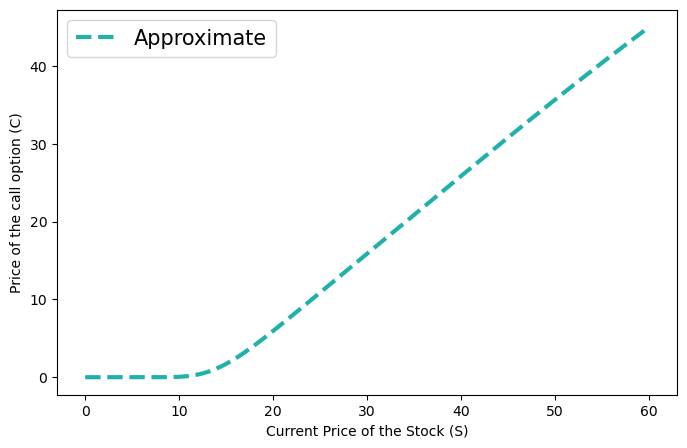

In [76]:
plt.figure(figsize=(8,5), dpi=100)
plt.plot(s,C_exp,color='#20b2aa', ls='--', lw=3, label='Approximate');
plt.xlabel('Current Price of the Stock (S)')
plt.ylabel('Price of the call option (C)')
plt.legend(loc='upper left',prop={'size':15});

In [77]:
# now we look to the exact solutions to compare 

C_exact = np.zeros(M+1)

d1 = (np.log1p(s/E) + (r+0.5*sigma**2)*T) / (sigma * np.sqrt(T))
d2 = d1 - (sigma * np.sqrt(T))
C_exact = s * norm.cdf(d1) - E*np.exp(-r*T) * norm.cdf(d2)
C_exact = np.clip(C_exact, 0, np.inf)

print(C_exact[int(M/2)])

15.873532211330735


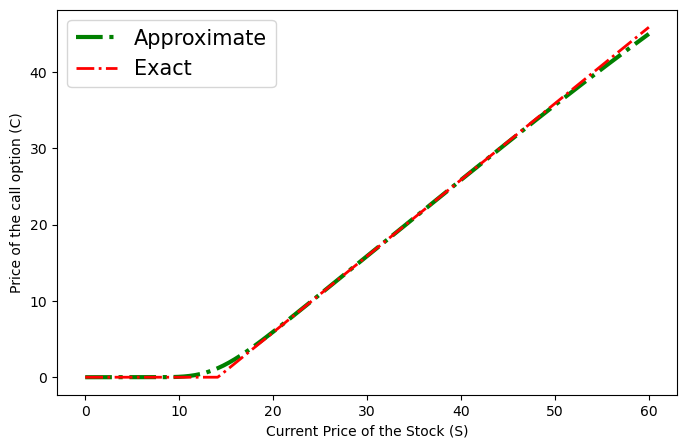

In [78]:
plt.figure(figsize=(8,5), dpi=100)
plt.plot(s, C_exp, color='green', ls='-.', lw=3, label='Approximate');
plt.plot(s, C_exact, color='red', ls='-.', lw=2, label='Exact')
plt.xlabel('Current Price of the Stock (S)')
plt.ylabel('Price of the call option (C)')
plt.legend(loc='upper left',prop={'size':15});

In [79]:
### now lets compute the errors 

def error(p,p_s):
    err = np.abs(p-p_s)
    err1 = np.abs(p-p_s) / np.abs(p)
    print("True value:", p)
    print("Aproximate value:", p_s)
    print("Absolute error:", err)
    print("Relative error:", err1)
    
error(C_exact[int(M/2)],C_exp[int(M/2)])

True value: 15.873532211330735
Aproximate value: 15.873537977031166
Absolute error: 5.765700430870879e-06
Relative error: 3.632273116096521e-07
